In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
# Importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [4]:
df=pd.read_csv("heart.csv")
data_info = df.info()
data_head = df.head()

data_info, data_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


(None,
    age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
 0   63    1   3     145   233    1        0       150     0      2.3    0   
 1   37    1   2     130   250    0        1       187     0      3.5    0   
 2   41    0   1     130   204    0        0       172     0      1.4    2   
 3   56    1   1     120   236    0        1       178     0      0.8    2   
 4   57    0   0     120   354    0        1       163     1      0.6    2   
 
    caa  thall  output  
 0    0      1       1  
 1    0      2       1  
 2    0      2       1  
 3    0      2       1  
 4    0      2       1  )

Plotting the distribution of the target variable 'output'

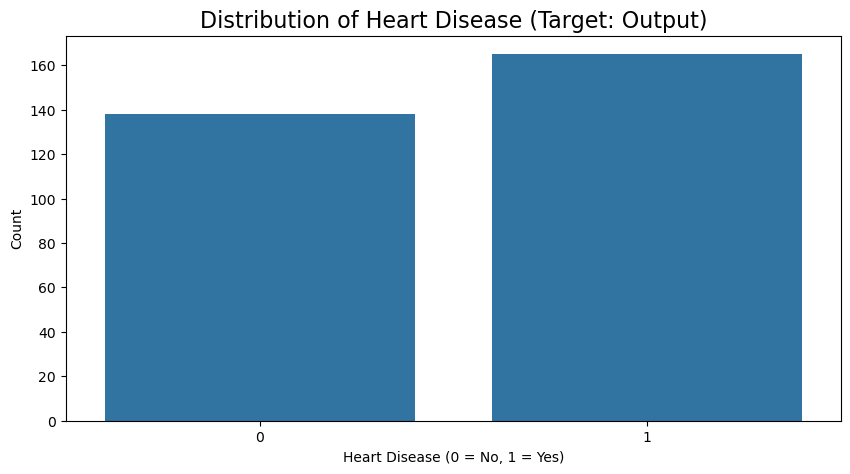

In [5]:
plt.figure(figsize=(10, 5))
sns.countplot(x='output', data=df)
plt.title('Distribution of Heart Disease (Target: Output)', fontsize=16)
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

Distribution of Age

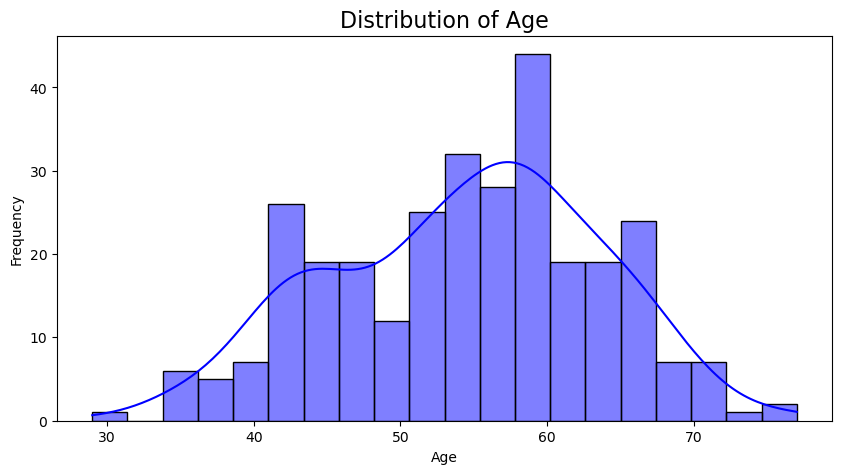

In [6]:
plt.figure(figsize=(10, 5))
sns.histplot(df['age'], bins=20, kde=True, color='blue')
plt.title('Distribution of Age', fontsize=16)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

Correlation heatmap to see relationships between variables

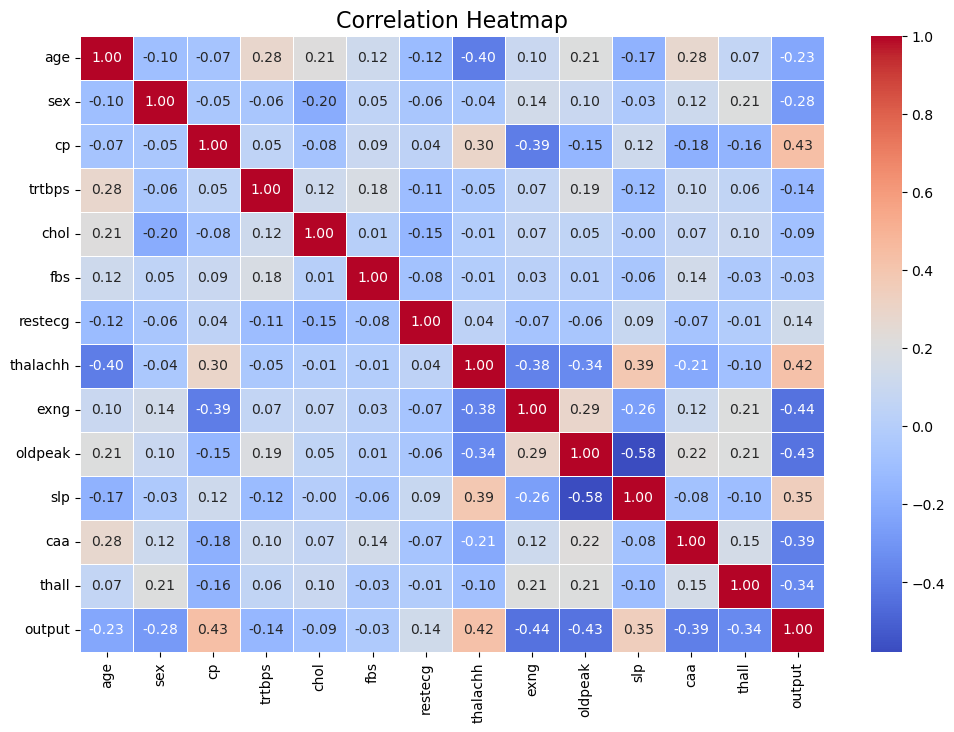

In [7]:
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

Boxplot of Age against the target 'output'

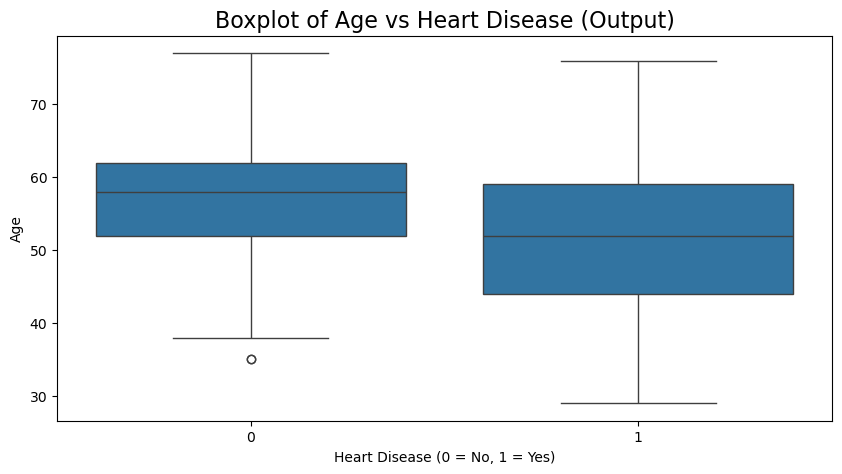

In [8]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='output', y='age', data=df)
plt.title('Boxplot of Age vs Heart Disease (Output)', fontsize=16)
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Age')
plt.show()

Pairplot for selected variables

In [9]:
# selected_features = ['age', 'chol', 'thalachh', 'trtbps', 'output']
# sns.pairplot(df[selected_features], hue='output')
# plt.suptitle('Pairplot of Selected Features by Heart Disease (Output)', y=1.02, fontsize=16)
# plt.show()

### Step 1: Split the dataset into training and testing sets

In [10]:
x = df.drop('output', axis=1)  # Features 
y = df['output']  # Target 

### Step 2: Split the dataset into training and testing sets

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### Step 3: Feature scaling (optional but recommended for Logistic Regression) 

In [11]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Step 4: Initialize and train the Logistic Regression model

In [12]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

### Step 5: Make predictions on the test set

In [13]:
y_pred = model.predict(X_test_scaled)

### Step 6: Evaluate the model

In [14]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

## Print results

In [15]:
print(f"Accuracy: {accuracy * 100:.2f}%")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


Accuracy: 85.25%
Confusion Matrix:
 [[25  4]
 [ 5 27]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



# TEST

In [18]:
new_data = pd.DataFrame({
    'age': [55],
    'sex': [1],
    'cp': [2],
    'trtbps': [130],
    'chol': [250],
    'fbs': [0],
    'restecg': [1],
    'thalachh': [150],
    'exng': [0],
    'oldpeak': [1.5],
    'slp': [2],
    'caa': [1],
    'thall': [2]
})

new_data_scaled = scaler.transform(new_data)

predictions = model.predict(new_data_scaled)

print("Predicted output for new data: ", predictions)

Predicted output for new data:  [1]
